In [1]:
import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

all_meta_path = glob.glob(os.path.join('dataset_128', 'train', 'CASE*', 'meta', '*.csv'))
test_meta_path = glob.glob(os.path.join('dataset_128', 'test', 'meta', '*.csv'))
"""
train_scaler = MinMaxScaler(feature_range=(-1,1))
test_scaler = MinMaxScaler(feature_range=(-1,1))

all_meta_path[0]
train_val_meta = [train_scaler.fit_transform(torch.Tensor(pd.read_csv(i)[['내부온도관측치', '외부온도관측치', '내부습도관측치', '외부습도관측치', 'CO2관측치', 'EC관측치',
       '최근분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '냉방온도', '냉방부하',
       '난방온도', '난방부하', '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량']].fillna(-1).to_numpy().flatten().astype('float32')).reshape(1,-1)).squeeze(0) for i in all_meta_path]
"""

"\ntrain_scaler = MinMaxScaler(feature_range=(-1,1))\ntest_scaler = MinMaxScaler(feature_range=(-1,1))\n\nall_meta_path[0]\ntrain_val_meta = [train_scaler.fit_transform(torch.Tensor(pd.read_csv(i)[['내부온도관측치', '외부온도관측치', '내부습도관측치', '외부습도관측치', 'CO2관측치', 'EC관측치',\n       '최근분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '냉방온도', '냉방부하',\n       '난방온도', '난방부하', '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량']].fillna(-1).to_numpy().flatten().astype('float32')).reshape(1,-1)).squeeze(0) for i in all_meta_path]\n"

In [3]:
columns = ['내부온도관측치', '외부온도관측치', '내부습도관측치', '외부습도관측치', 'CO2관측치', 'EC관측치',
       '최근분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '냉방온도', '냉방부하',
       '난방온도', '난방부하', '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량']

In [42]:
pd.read_csv(all_meta_path[1590])

,Unnamed: 0,시간,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,냉방온도,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,0,2021-05-28 02:46,22.600000,21.299999,78.199997,54.000000,597.0,0.0,126.00,0.0,0.0,0.0,21.0,8.000002,20.0,0.0,0.0,0.0,0.0,0.0
1,1,2021-05-28 02:47,22.600000,21.400000,79.099998,54.000000,598.0,0.0,126.00,0.0,0.0,0.0,21.0,8.000002,20.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-05-28 02:48,22.700001,21.400000,79.599998,54.000000,607.0,0.0,126.00,0.0,0.0,0.0,21.0,8.500004,20.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-05-28 02:49,22.700001,21.299999,79.900002,54.000000,608.0,0.0,126.00,0.0,0.0,0.0,21.0,8.500004,20.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-05-28 02:50,22.700001,21.400000,80.300003,54.000000,610.0,0.0,126.00,0.0,0.0,NaN,21.0,8.500004,20.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,2021-05-29 02:41,22.299999,21.600000,76.099998,58.200001,562.0,0.0,119.57,0.0,0.0,0.0,21.0,6.499996,20.0,0.0,0.0,0.0,0.0,0.0
1436,1436,2021-05-29 02:42,22.400000,21.700001,77.199997,58.200001,561.0,0.0,119.57,0.0,0.0,0.0,21.0,6.999998,20.0,0.0,0.0,0.0,0.0,0.0
1437,1437,2021-05-29 02:43,22.500000,21.900000,80.199997,58.299999,570.0,0.0,119.57,0.0,0.0,0.0,21.0,7.500000,20.0,0.0,0.0,0.0,0.0,0.0
1438,1438,2021-05-29 02:44,22.600000,21.900000,81.300003,58.200001,564.0,0.0,119.57,0.0,0.0,0.0,21.0,8.000002,20.0,0.0,0.0,0.0,0.0,0.0


In [74]:
import tqdm
water = []
for i in (range(1592)):
    temp = pd.read_csv(all_meta_path[i])["레드 LED동작강도"]
    if np.array(temp).sum()!=np.nan:
        #temp = temp.fillna(method='bfill')
        #temp = temp.fillna(method='ffill')
        #temp = temp.fillna(0)
        water.append(max(temp))
    

In [40]:
water.sort()

In [41]:
water.sort()
water[-10:]

[[68.4000015258789, 1199],
 [68.5, 1197],
 [70.4000015258789, 1193],
 [70.5999984741211, 1584],
 [70.6999969482421, 1198],
 [72.1999969482421, 1581],
 [72.4000015258789, 1579],
 [73.9000015258789, 1590],
 [74.0, 1575],
 [74.3000030517578, 1580]]

(array([453.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0., 130.,   0.,
          1.,   0.,   0., 559.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  26.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  30.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         18.]),
 array([  0.  ,   2.01,   4.02,   6.03,   8.04,  10.05,  12.06,  14.07,
         16.08,  18.09,  20.1 ,  22.11,  24.12,  26.13,  28.14,  30.15,
         32.16,  34.17,  36.18,  38.19,  40.2 ,  42.21,  44.22,  46.23,
         48.24,  50.25,  52.26,  54.27,  56.28,  58.29,  60.3 ,  62.31,
         64.32,  66.33,  68.34

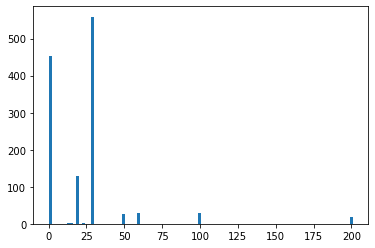

In [75]:
plt.hist(water, bins=100)

In [73]:
pd.read_csv(all_meta_path[791])

,Unnamed: 0,시간,내부온도관측치,외부온도관측치,내부습도관측치,외부습도관측치,CO2관측치,EC관측치,최근분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,냉방온도,냉방부하,난방온도,난방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,0,2021-04-02 16:59,27.700001,26.799999,59.099998,30.200001,472.0,2.040293,769.0,100.0,0.0,0.0,26.0,8.500004,25.0,0.0,309.41,309.41,0.0,0.0
1,1,2021-04-02 17:00,27.600000,26.700001,59.799999,30.200001,472.0,2.040293,769.0,100.0,0.0,0.0,26.0,8.000002,25.0,0.0,309.41,309.41,0.0,0.0
2,2,2021-04-02 17:01,27.700001,26.799999,60.299999,30.200001,475.0,2.091662,769.0,100.0,0.0,0.0,26.0,8.500004,25.0,0.0,309.41,309.41,0.0,0.0
3,3,2021-04-02 17:02,28.799999,26.900000,50.599998,30.200001,464.0,2.089686,769.0,100.0,0.0,0.0,26.0,13.999996,25.0,0.0,309.41,309.41,0.0,0.0
4,4,2021-04-02 17:03,29.400000,26.900000,42.799999,30.200001,467.0,2.091662,769.0,100.0,0.0,0.0,26.0,16.999998,25.0,0.0,309.41,309.41,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,2021-04-03 16:54,28.299999,26.799999,54.900002,39.099998,463.0,2.139080,769.0,NaN,0.0,0.0,26.0,8.999996,25.0,0.0,309.41,309.41,0.0,0.0
1436,1436,2021-04-03 16:55,28.799999,26.799999,55.299999,39.000000,463.0,2.137104,769.0,100.0,0.0,0.0,26.0,13.999996,25.0,0.0,309.41,309.41,0.0,0.0
1437,1437,2021-04-03 16:56,29.100000,26.799999,55.599998,39.099998,460.0,2.135128,769.0,100.0,0.0,0.0,26.0,15.500002,25.0,0.0,309.41,309.41,0.0,0.0
1438,1438,2021-04-03 16:57,29.299999,26.799999,55.099998,38.700001,456.0,2.087711,769.0,100.0,0.0,0.0,26.0,16.499996,25.0,0.0,309.41,309.41,0.0,0.0


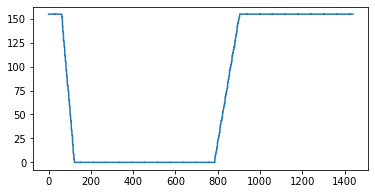

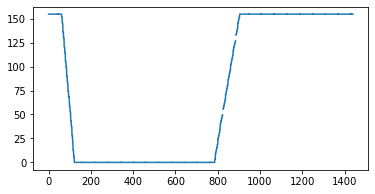

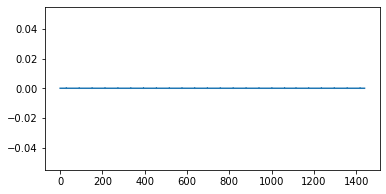

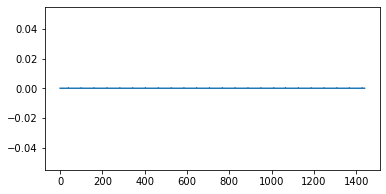

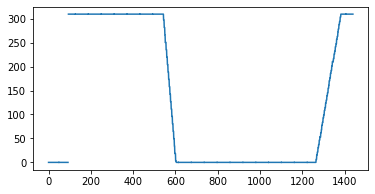

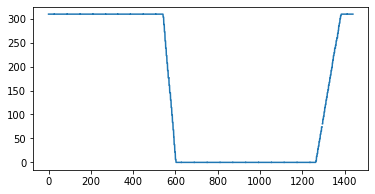

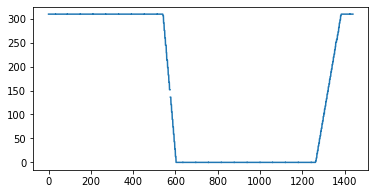

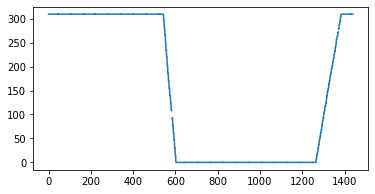

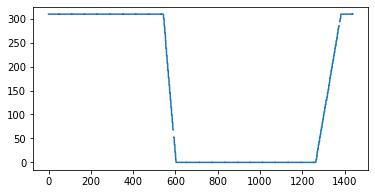

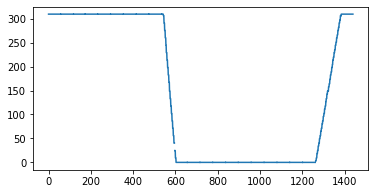

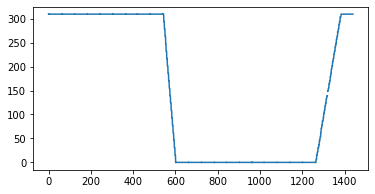

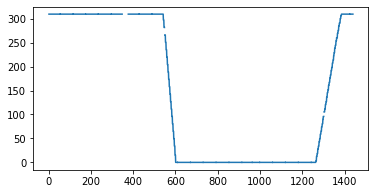

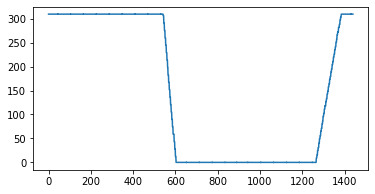

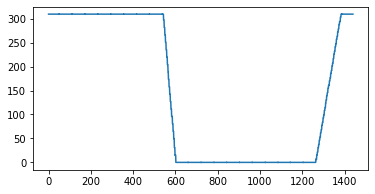

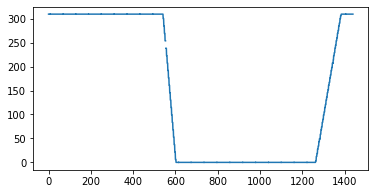

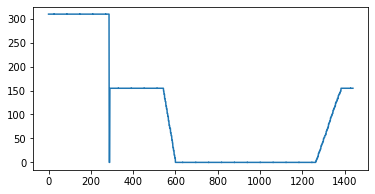

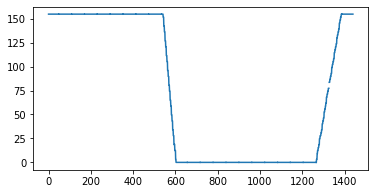

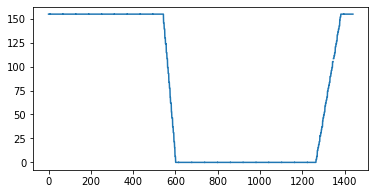

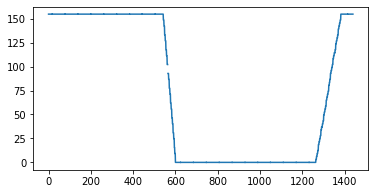

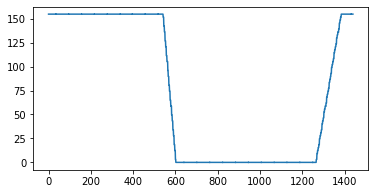

In [77]:
x = np.linspace(0,1439,1440)
for i in range(700,720):
    plt.figure(figsize=(6,3))
    plt.plot(x,pd.read_csv(all_meta_path[i])["백색광추정광량"])    

3